# Task 4

#### Import TensorFlow

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [ ]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))   
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i].squeeze(), cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

#### Load MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

11501568/11490434 [==============================] - 0s 0us/step


#### Before

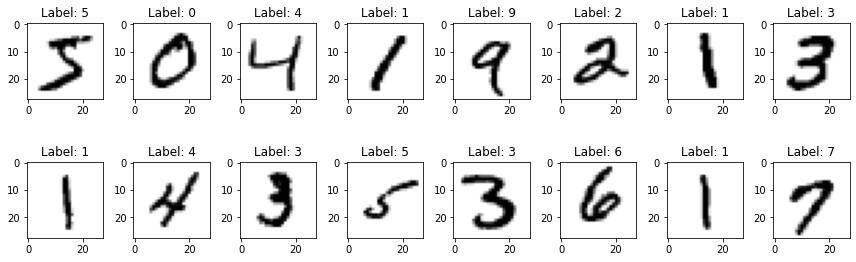

In [ ]:
displaySamplesFromDataSet(train_images, train_labels)

#### Flip Image

In [ ]:

def flip_image(images):
  flipped_images = []

  for img in images:
    flipped_images.append(cv2.flip(img, 1))
  return flipped_images

In [ ]:
train_flipped_images = flip_image(train_images)
train_flipped_images = np.array(train_flipped_images, dtype=np.float32) / 255

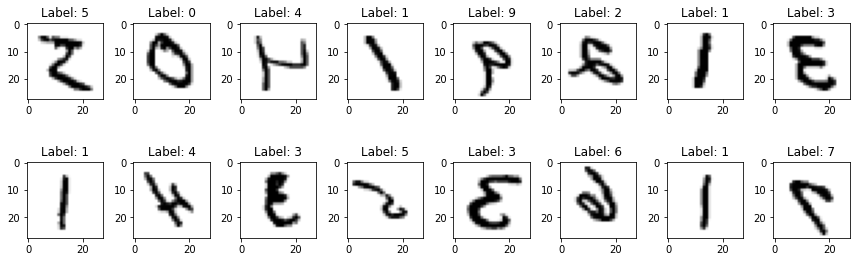

In [ ]:
displaySamplesFromDataSet(train_flipped_images, train_labels)

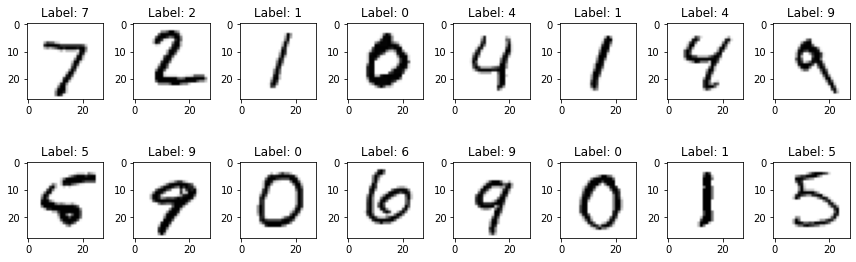

In [ ]:
displaySamplesFromDataSet(test_images, test_labels)

#### Build and Train Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_flipped_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 2.3017 - accuracy: 0.1109 - val_loss: 2.3100 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 63s 34ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3088 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3087 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3086 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3095 - val_accuracy: 0.1139


313/313 - 3s - loss: 2.3095 - accuracy: 0.1139 - 3s/epoch - 9ms/step
ACCURACY: 0.11389999836683273


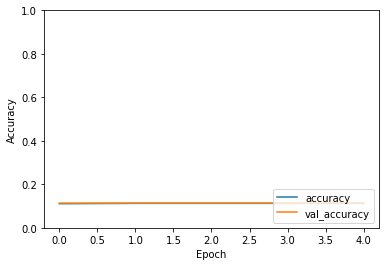

In [ ]:
evaluate(test_images, test_labels, model)